# Variational Quantum Adiabatic Algorithm (VQAA)

In [1]:
import sys

sys.path.append("../src")

import networkx as nx
from networkx.algorithms import approximation as approx
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2

In [2]:
from solver.quantum import solver_VQAA, plot_distribution
from graph.mapping import map_to_UDG

In [14]:
import warnings
warnings.filterwarnings("ignore")

# 1. MIS of a 5 nodes graph 

Maximum independent set of G: {1, 3, 4}


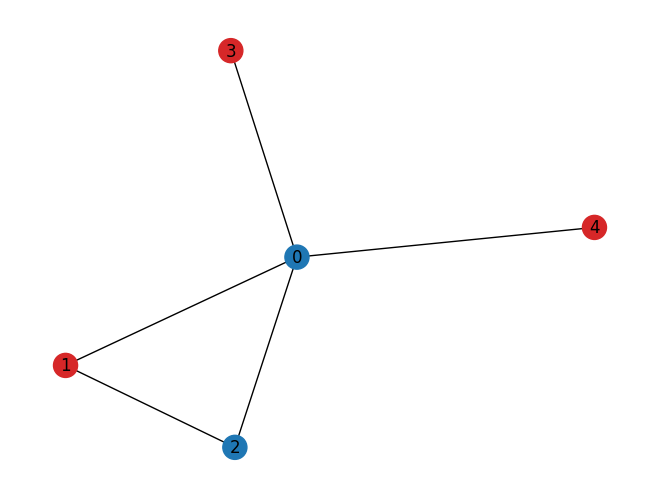

In [3]:
G = nx.Graph(
    [
        (0, 1),
        (0, 2),
        (0, 3),
        (0, 4),
        (1, 2),
    ]
) 

I = approx.maximum_independent_set(G)
print(f"Maximum independent set of G: {I}")

pos = nx.spring_layout(G) #, seed=39299899
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G],
)

## 1.1 Embedding by hand

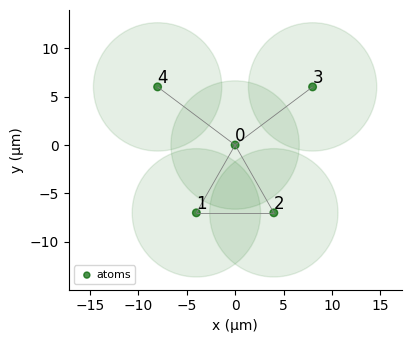

In [10]:
qubits = {'0': (0,0), '1': (-4,-7), '2': (4, -7), '3': (8,6), '4': (-8, 6)}
reg_by_hand = Register(qubits)
reg_by_hand.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True
)

## 1.2 Embedding as an optimization process

In [26]:
positions = map_to_UDG(G)

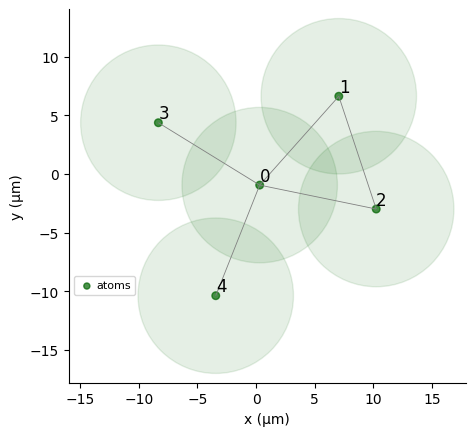

In [27]:
reg = Register(positions)

reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

## 1.3 VQAA for MIS in the 5 nodes case  

The VQAA solver needs the following parameters: 
- **Register**: The atomic register representing the problem in the quantum device
- **Graph**: The networkx graph used before the encoding to the register 
- **number_best_solution**: The amount of solutions to output from the best ones 
- **omega_range**: The range of frequencies to used for the optimizer parameters. Default (1,5)
- **detuning_range**: The range of detuning to used for the optimizer parameters. Default (1,5)
- **time_range**: The range of time evolution for the adiabatic process to used for the optimizer parameters. Default (8,25)
- **minimizer_method**: Minimizer to use from scipy. Default Nelder-Mead
- **repetitions**: The number of times to repeat the optimization. Default(10) 

The output of the VQAA solver is the following:

- **counts**: The dictionary of counts of the QAA with the optimal parameters
- **opt_param**: Optimal parameters for the QAA
- **solution**: The list of solutions given the optimal parameters  

In [15]:
# QUANTUM SOLVER
counts_solution_5_nodes, opt_param_5_nodes , solution_5_nodes = solver_VQAA(reg_by_hand,
                                                                            G,
                                                                            number_best_solutions = 3, 
                                                                            repetitions = 1)

In [21]:
print('Optimal time evolution (ns):', opt_param_5_nodes[0]) 
print('Optimal omega:', opt_param_5_nodes[1]) 
print('Optimal detuning:', opt_param_5_nodes[2]) 
print('Best 3 solutions',solution_5_nodes)

Optimal time evolution (ns): 28388.888888888898
Optimal omega: 2.9671467943819305
Optimal detuning: 3.1601812928162243
Best 3 solutions [['1', '3', '4'], ['2', '3', '4'], ['3', '4']]


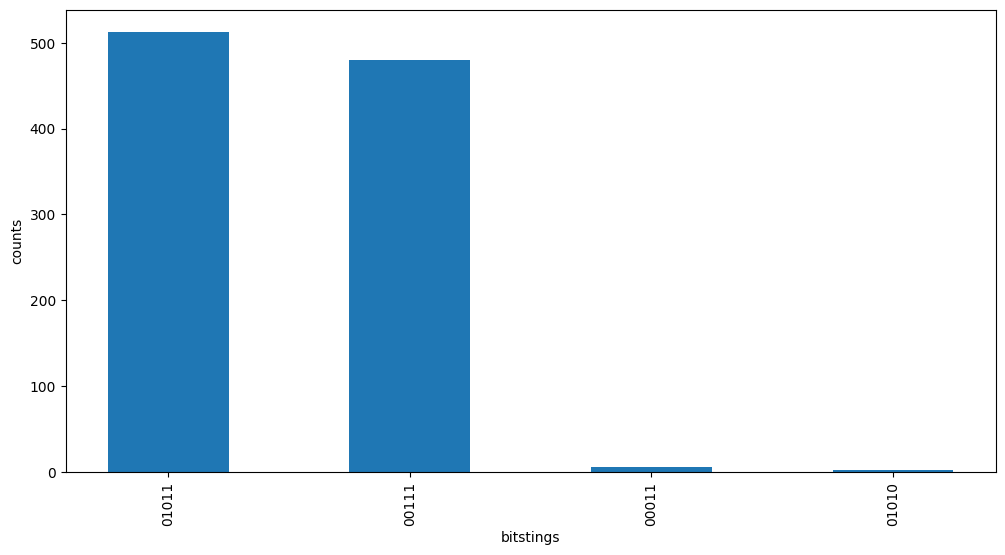

In [16]:
plot_distribution(counts_solution_5_nodes)

# 2. MIS of a 5 nodes graph 

Maximum independent set of G: {3, 4, 5, 6}


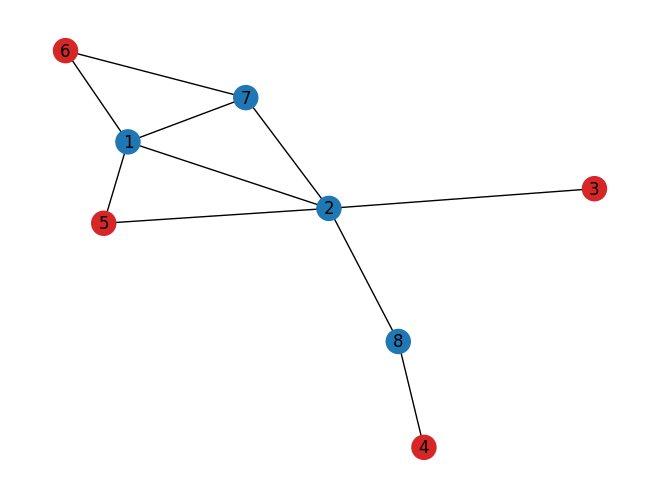

In [22]:
G_8 = nx.Graph(
    [
        (1, 2),
        (7, 2),
        (3, 2),
        (7, 6),
        (5, 2),
        (1, 5),
        (2, 8),
        (1, 7),
        (6, 1),
        (8, 4),
    ]
)

I = approx.maximum_independent_set(G_8)
print(f"Maximum independent set of G: {I}")

pos = nx.spring_layout(G_8, seed=39299899)
nx.draw(
    G_8,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G_8],
)

## 2.1 Embedding by hand

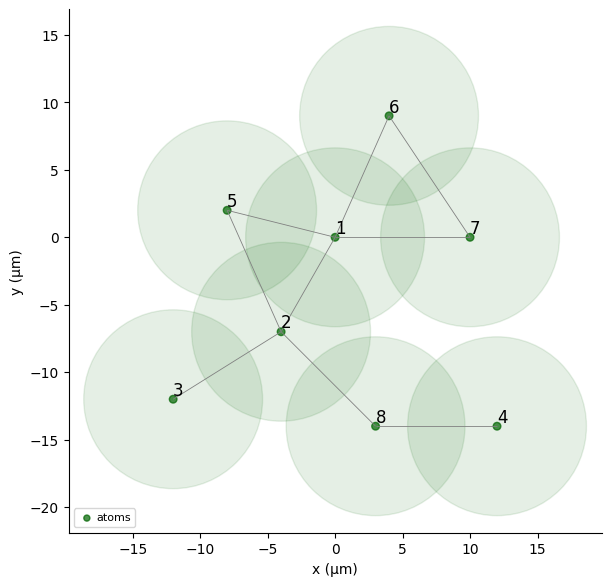

In [28]:
qubits_8 = {'1': (0,0), '2': (-4,-7), '3': (-12, -12), '4': (12,-14), '5': (-8, 2),  '6': (4,9), '7': (10,0), '8': (3,-14)}
reg_by_hand_8 = Register(qubits_8) 
reg_by_hand_8.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True
)

In [29]:
positions_8 = map_to_UDG(G_8)

Problem while generating UDG graph: the number of resulting edges is not equal to the inital number of  edges.


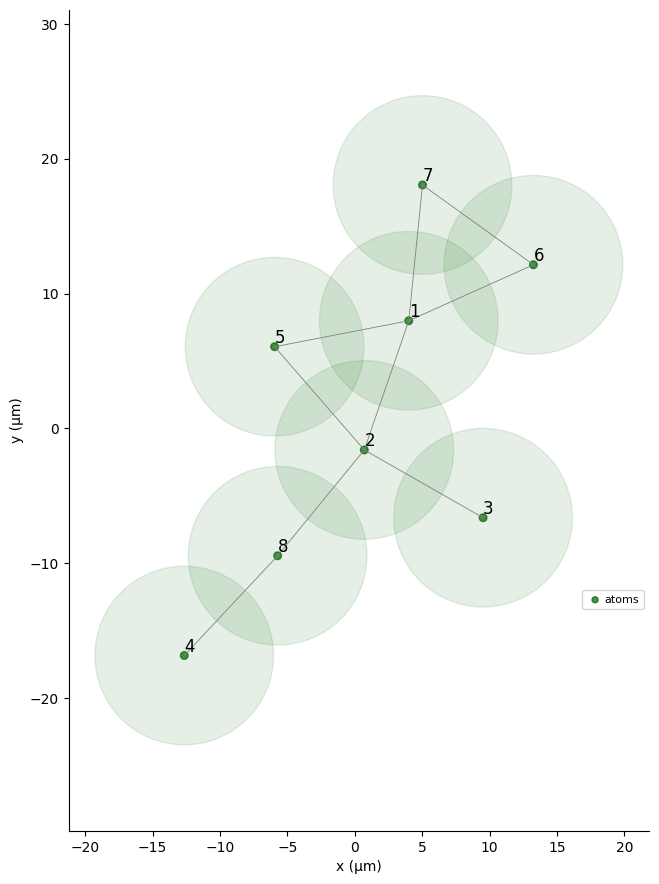

In [30]:
reg_8 = Register(positions_8)

reg_8.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

In [31]:
# QUANTUM SOLVER
counts_solution_8_nodes, opt_param_8_nodes , solution_8_nodes = solver_VQAA(reg_by_hand_8,
                                                                            G_8,
                                                                            number_best_solutions = 7, 
                                                                            time_range= (15,30),
                                                                            repetitions = 16)

In [32]:
print('Optimal time evolution (ns):', opt_param_8_nodes[0]) 
print('Optimal omega:', opt_param_8_nodes[1]) 
print('Optimal detuning:', opt_param_8_nodes[2]) 
print('Best 7 solutions',solution_8_nodes)

Optimal time evolution (ns): 24277.343750000007
Optimal omega: 4.054144179679718
Optimal detuning: 2.7214470518219622
Best 7 solutions [['3', '4', '5', '7'], ['3', '4', '5', '6'], ['3', '4', '6'], ['3', '4', '5'], ['3', '5', '6', '8'], ['3', '5', '7', '8'], ['3', '6', '8']]


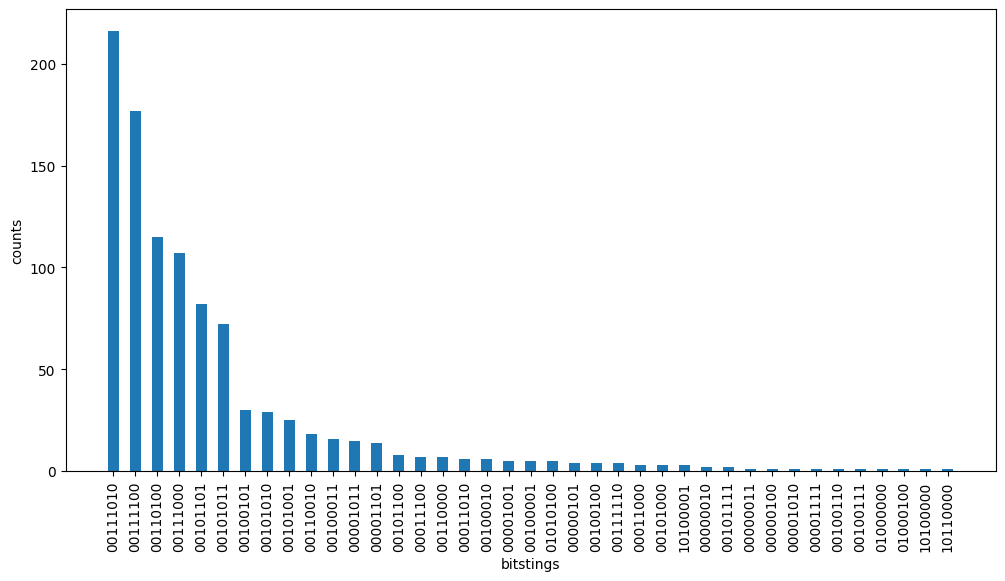

In [33]:
plot_distribution(counts_solution_8_nodes)

In [34]:
opt_param_8_nodes

array([2.42773438e+04, 4.05414418e+00, 2.72144705e+00])